## HW 1, ANLY 590

### Amit Arora (aa1603)

## 1. Feedforward: Building a ReLu 2 Layer neural network

### Part 1

The diagram of the neural network with 2 inputs, 2 hidden layer (3 neurons and 2 neurons) and an output layer with the 3 outputs is presented below.

![neural network](nn12.png)

### Part 2
Mathematical equations of this network is as follows. 



$y=\begin{bmatrix}y_{1} \\ y_{2} \\ y_{3}\end{bmatrix}$

$z=\begin{bmatrix}z_{1} \\ z_{2} \\ z_{3}\end{bmatrix}$

$y_1 = softmax(z_1, z)$

$y_2 = softmax(z_2, z)$

$y_3 = softmax(z_3, z)$

$z_{1}= h_{21}u_{11} + h_{22}u_{21} + c_1$

$z_{2}= h_{21}u_{12} + h_{22}u_{22} + c_2$

$z_{3}= h_{21}u_{13} + h_{22}u_{23} + c_3$

$h_{21} = ReLu(h_{11}v_{11} + h_{12}v_{21} + h_{13}v_{31} + b_{21})$

$h_{22} = ReLu(h_{11}v_{12} + h_{12}v_{22} + h_{13}v_{31} + b_{22})$

$h_{11} = ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11})$

$h_{12} = ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12})$

$h_{13} = ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13})$



Combining the above equations the final equation for this network can be written as

$z_{1}= (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{11} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{21} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{21}))u_{11} + (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{12} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{22} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{22}))u_{21} + c_1$

$z_{2}= (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{11} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{21} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{21}))u_{12} + (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{12} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{22} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{22}))u_{22} + c_2$

$z_{3}= (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{11} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{21} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{21}))u_{13} + (ReLu((ReLu(x_{1}w_{11} + x_{2}w_{21} + b_{11}))v_{12} + (ReLu(x_{1}w_{12} + x_{2}w_{22} + b_{12}))v_{22} + (ReLu(x_{1}w_{13} + x_{2}w_{23} + b_{13}))v_{31} + b_{22}))u_{23} + c_3$

### Part 3 Python implementation

In [445]:
import numpy as np
def softmax(x):
    # softmax assuming x is a numpy array 
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def relu(x):
    # relu assuming x is a numpy array  
    return np.maximum(x, 0)


In [446]:
# input weight matrix hidden layer 1
W1 = np.matrix([[1, 0],
                [-1, 0],
                [0, 0.5]])
# bias, hidden layer 1
b1 = np.array([[0],
               [0],
               [1]])

# input weight matrix hidden layer 2
W2 = np.matrix([[1, 0, 0], 
                [-1, -1, 0]])
# bias, hidden layer 2
b2 = np.array([[1],
               [-1]])

# input weight matrix outut layer
V = np.array([[1, 1], 
              [0, 0],
              [-1, -1]])
# bias, output layer
c = np.array([[1], 
             [0],
             [0]])

X = np.matrix([[1, 0, 0], [-1, -1, 1]])

In [447]:
# first hidden layer
h1 = relu(W1.dot(X)+b1)

# second hidden layer
h2 = relu(W2.dot(h1)+b2)

# output layer (minus the softmax)
z = V.dot(h2) + c

# final output
y = softmax(z)

print("neural net output, class probabilities for each input vector to be read columnwise")
y

neural net output, class probabilities for each input vector to be read columnwise


matrix([[0.94649912, 0.84379473, 0.84379473],
        [0.04712342, 0.1141952 , 0.1141952 ],
        [0.00637746, 0.04201007, 0.04201007]])

## Problem 2 Gradient Descent

### Part 1

Partial derivatives of the Rosenbrock function can be calculated as follows:
$f(x,y) = (1-x)^2 + 100(y-x^{2})^{2}$

$\frac{\partial f}{\partial x} = 2(1-x)(-1) + 100(2(y-x^{2}))(-2x) = -2(1-x) - 400x(y-x^{2})$

$\frac{\partial f}{\partial y} = 0 + 200(y-x^{2})(1) = 200(y - x^{2})$


### Part 2

Contour plot of the Rosenbrock function is presented below.



In [372]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25


delta = 0.025
x = np.arange(-0.5, 2.0, delta)
y = np.arange(-0.5, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(1-X) + 100*np.square((Y-np.square(X)))

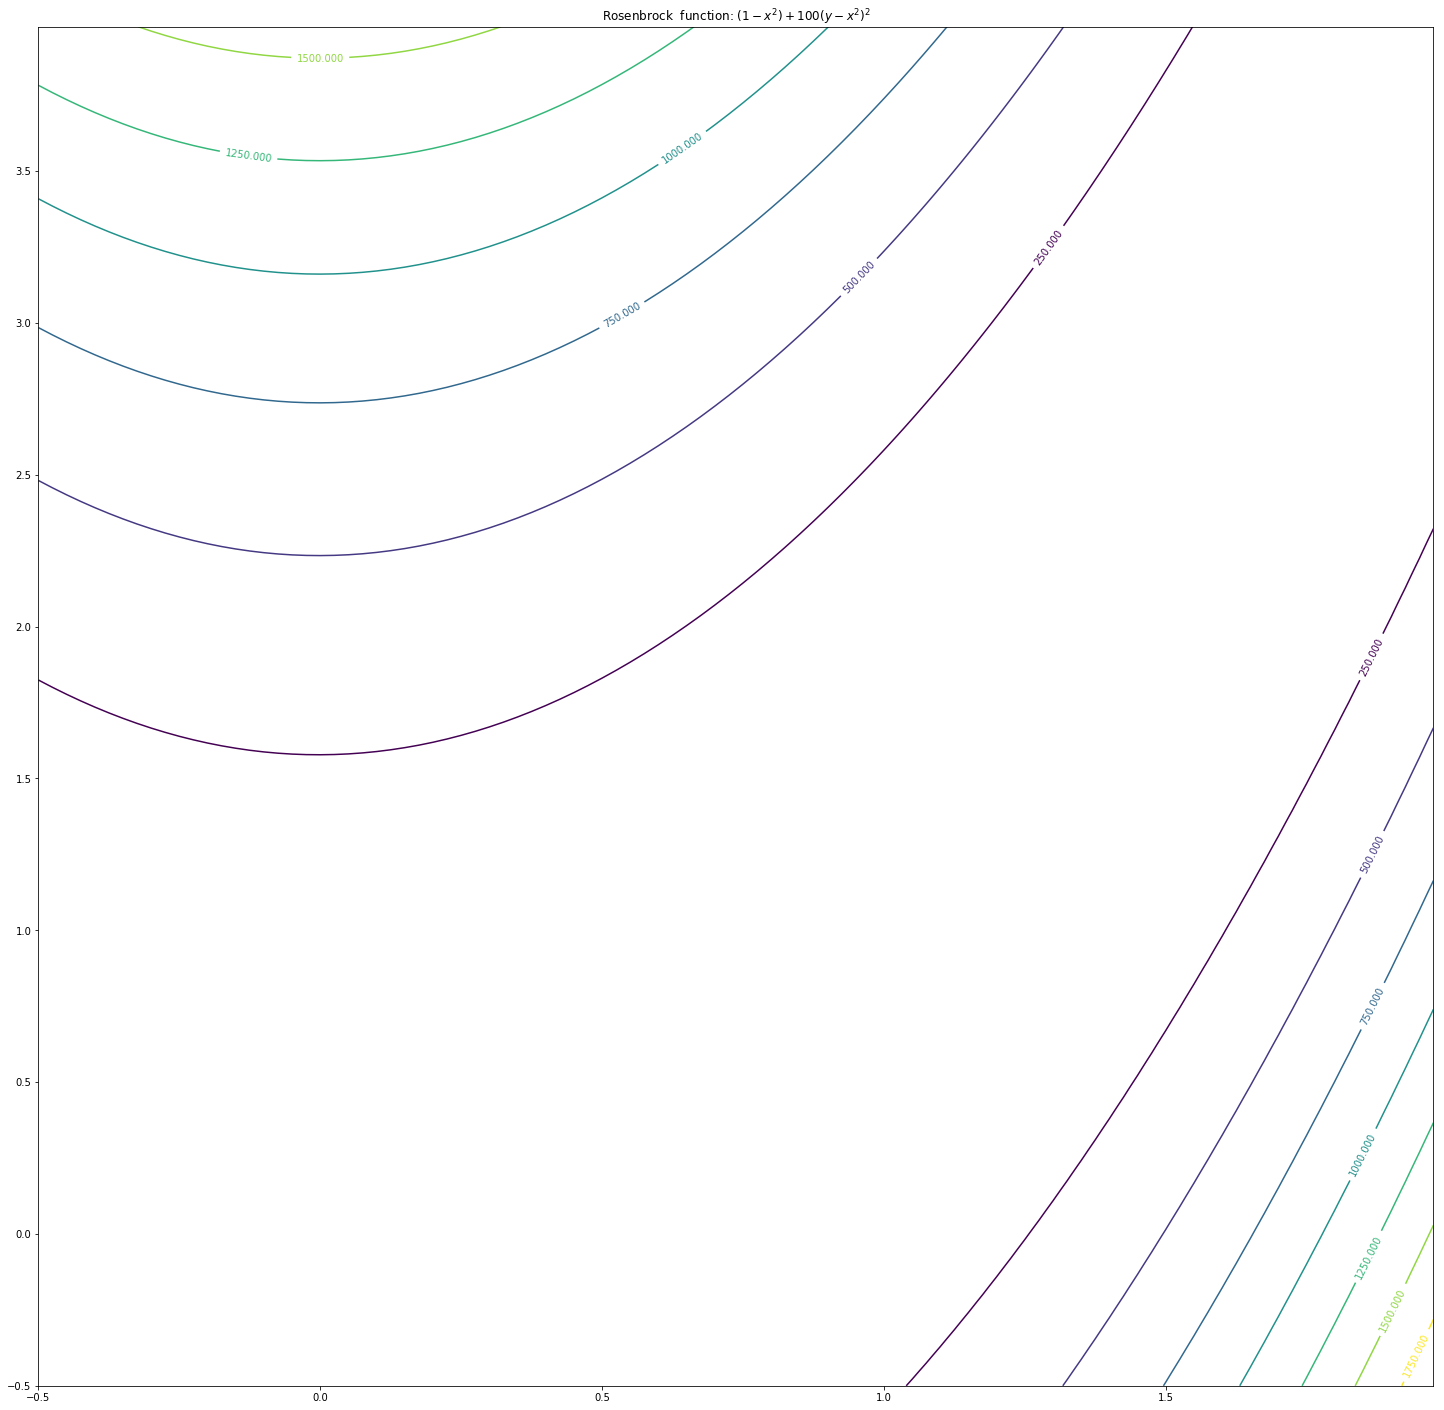

In [373]:
fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

title = ax.set_title(r'Rosenbrock  function: $(1-x^{2}) + 100(y-x^{2})^{2}$')

### Part 3
Code for gradient descent implementation is presented below.

1. A starting point of (5,5), learing rate of 0.0002 and max iterations 100,000 is able to to take us extremely close to the global minima that exists at 1,1. We are able to find reach to (0.99947156 0.99894129) in 100,000 iterations. Continuing the iterations to a 1 million is able to take us to (1,1) but we are not able to still meet the stopping criteria basedon the value of the function so we dont know if we have reached the global minimum.

2. Any learning rates greater than 0.0002 immediately overshoot the minima and we find that the value of the function has increased rather than decreasing.

In [450]:
def f(X):
    return np.square(1-X[0]) + 100*np.square((X[1]-np.square(X[0])))

def grad_f(X):
    return np.array([-2*(1-X[0]) - 400*(X[1]-np.square(X[0]))*X[0],
                     200*(X[1]-np.square(X[0]))])

def grad_descent(X, learning_rate, max_iter, verbose=False):
    z = f(X)
    trajectory = [X]
    ctr = 0
    while ctr < max_iter:
        X_new = X - learning_rate*grad_f(X)
        #print("iteration [{}] grad_f[{}] = {}, X_new is {}".format(ctr, X, grad_f(X), X_new))
        z_new = f(X_new)
        if z_new > z:
            print("iteration [{}] looks like we just went past the minima...z_new = {}, z = {}, X_new = {}".format(ctr, z_new, z, X_new))
            print("iteration [{}] returning {} as the minima".format(ctr, X))
            break
        else:
            if verbose is True:
                print("iteration [{}] function value {}".format(ctr, z_new))
        X = X_new
        z = z_new
        trajectory.append(X)
        ctr += 1
        
    if ctr == max_iter:
        print("minima not found even after {} iterations".format(max_iter))
        print("Closest we got to the minima was at {}".format(X))
        
    return trajectory
        
        

In [451]:
X=np.array([5 , 5])
learning_rate = 0.0002
max_iter = 100000
verbose = False
trajectory = grad_descent(X, learning_rate, max_iter, verbose)

minima not found even after 100000 iterations
Closest we got to the minima was at [0.99947156 0.99894129]


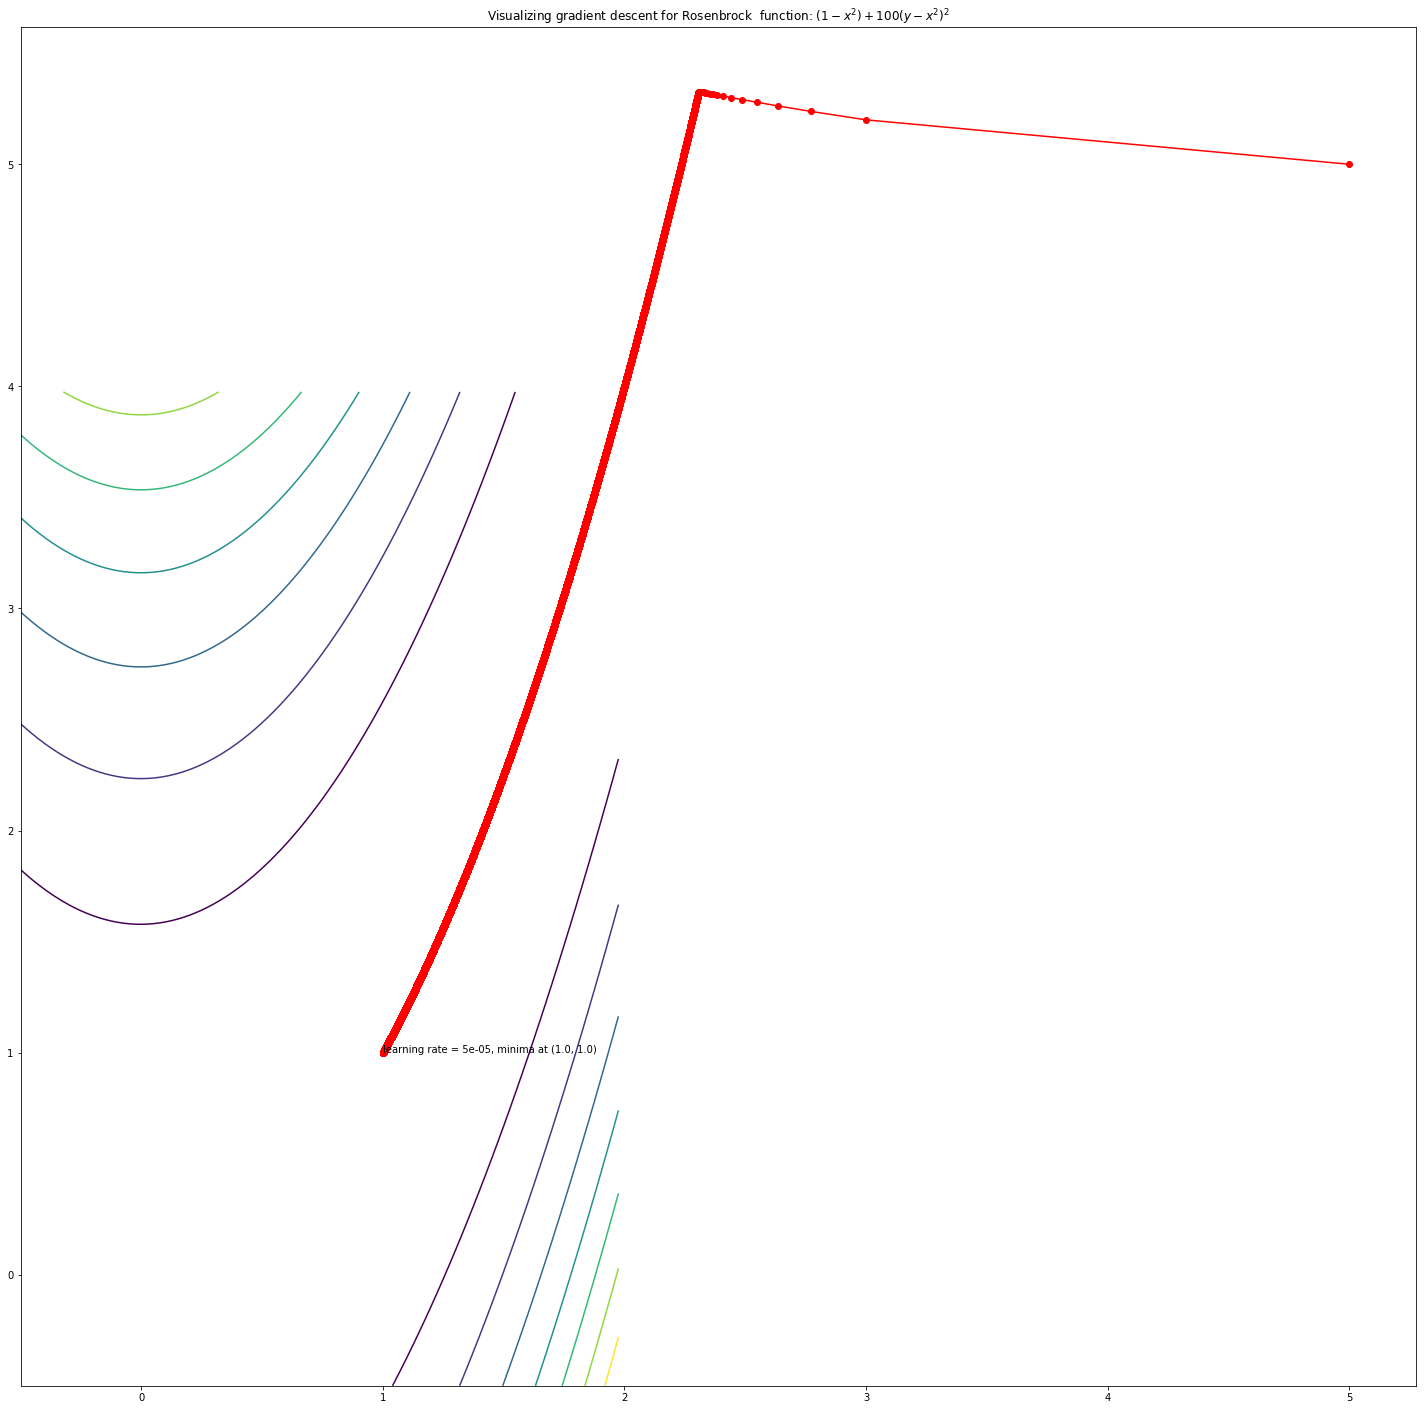

In [456]:
rcParams['figure.figsize'] = 25, 25
fig, ax = plt.subplots()
delta = 0.025
x = np.arange(-0.5, 2.0, delta)
y = np.arange(-0.5, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in trajectory]
y = [X[1] for X in trajectory]
plt.plot(x,y,'-o', color='red')
x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )
title = ax.set_title(r'Visualizing gradient descent for Rosenbrock  function: $(1-x^{2}) + 100(y-x^{2})^{2}$')

##### Learning rate 0.0003

A learning rate of 0.0003 is not able to find the minima.

In [458]:
# learning rate of 0.0003
X=np.array([5 , 5])
learning_rate = 0.0003
max_iter = 100000
verbose = False
trajectory = grad_descent(X, learning_rate, max_iter, verbose)
print("the learning rate of 0.0003 did not find the minima")

iteration [0] looks like we just went past the minima...z_new = 183535.81664607042, z = 40016, X_new = [-7.0024  6.2   ]
iteration [0] returning [5 5] as the minima
the learning rate of 0.0003 did not find the minima


##### Learning rate 0.00005

minima not found even after 1000000 iterations
Closest we got to the minima was at [1.00000004 1.00000009]


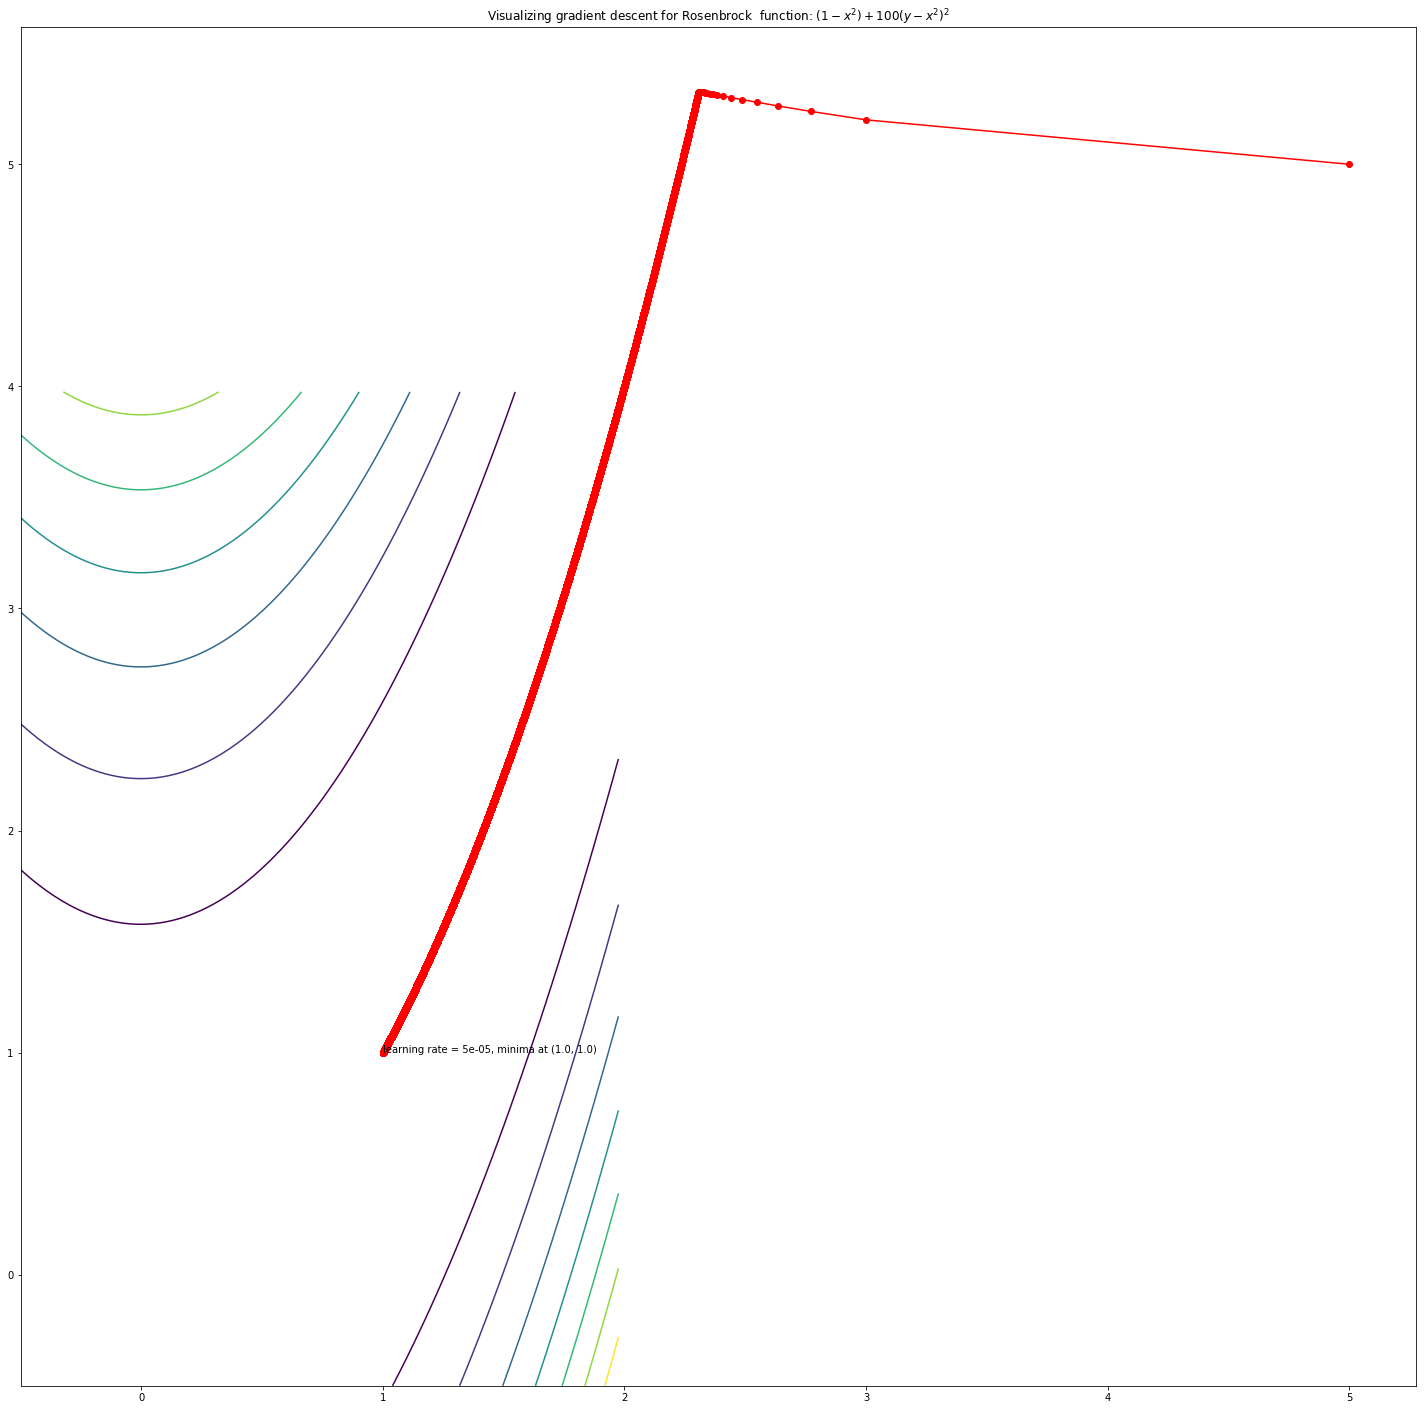

In [460]:
# learning rate of 0.00005
rcParams['figure.figsize'] = 25, 25
X=np.array([5 , 5])
learning_rate = 0.00005
max_iter = 1000000
verbose = False
trajectory = grad_descent(X, learning_rate, max_iter, verbose)

fig, ax = plt.subplots()
delta = 0.025
x = np.arange(-0.5, 2.0, delta)
y = np.arange(-0.5, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in trajectory]
y = [X[1] for X in trajectory]
plt.plot(x,y,'-o', color='red')
x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )
title = ax.set_title(r'Visualizing gradient descent for Rosenbrock  function: $(1-x^{2}) + 100(y-x^{2})^{2}$')

#### Part 4 Gradient descent with momentum

The code for gradient descent with momentum is presented below. 

1. With a learning_rate = 0.00001, alpha = 0.3, after 1 million iterations the closest we got to the minima was (1.06448089 1.13336778).

2 With a learning_rate = 0.00001, alpha = 0.5, after 1 million iterations the closest we got to the minima was (1.00709957 1.01427783).

In [462]:
def grad_descent_with_momentum(X, learning_rate, alpha, max_iter, verbose=False):
    z = f(X)
    trajectory = [X]
    v = np.zeros(X.size)
    ctr = 0
    while ctr < max_iter:
        v = alpha*v + learning_rate*grad_f(X)
        X_new = X - v
        #print("iteration [{}] grad_f[{}] = {}, X_new is {}".format(ctr, X, grad_f(X), X_new))
        z_new = f(X_new)
        if z_new > z:
            print("iteration [{}] looks like we just went past the minima...z_new = {}, z = {}, X_new = {}".format(ctr, z_new, z, X_new))
            print("iteration [{}] returning {} as the minima".format(ctr, X))
            break
        else:
            if verbose is True:
                print("iteration [{}] function value {}".format(ctr, z_new))
        X = X_new
        z = z_new
        trajectory.append(X)
        ctr += 1
        
    if ctr == max_iter:
        print("minima not found even after {} iterations".format(max_iter))
        print("Closest we got to the minima was at {}".format(X))
        
    return trajectory

##### Alpha 0.3, learning rate 0.00001

minima not found even after 100000 iterations
Closest we got to the minima was at [2.14808972 4.61682448]


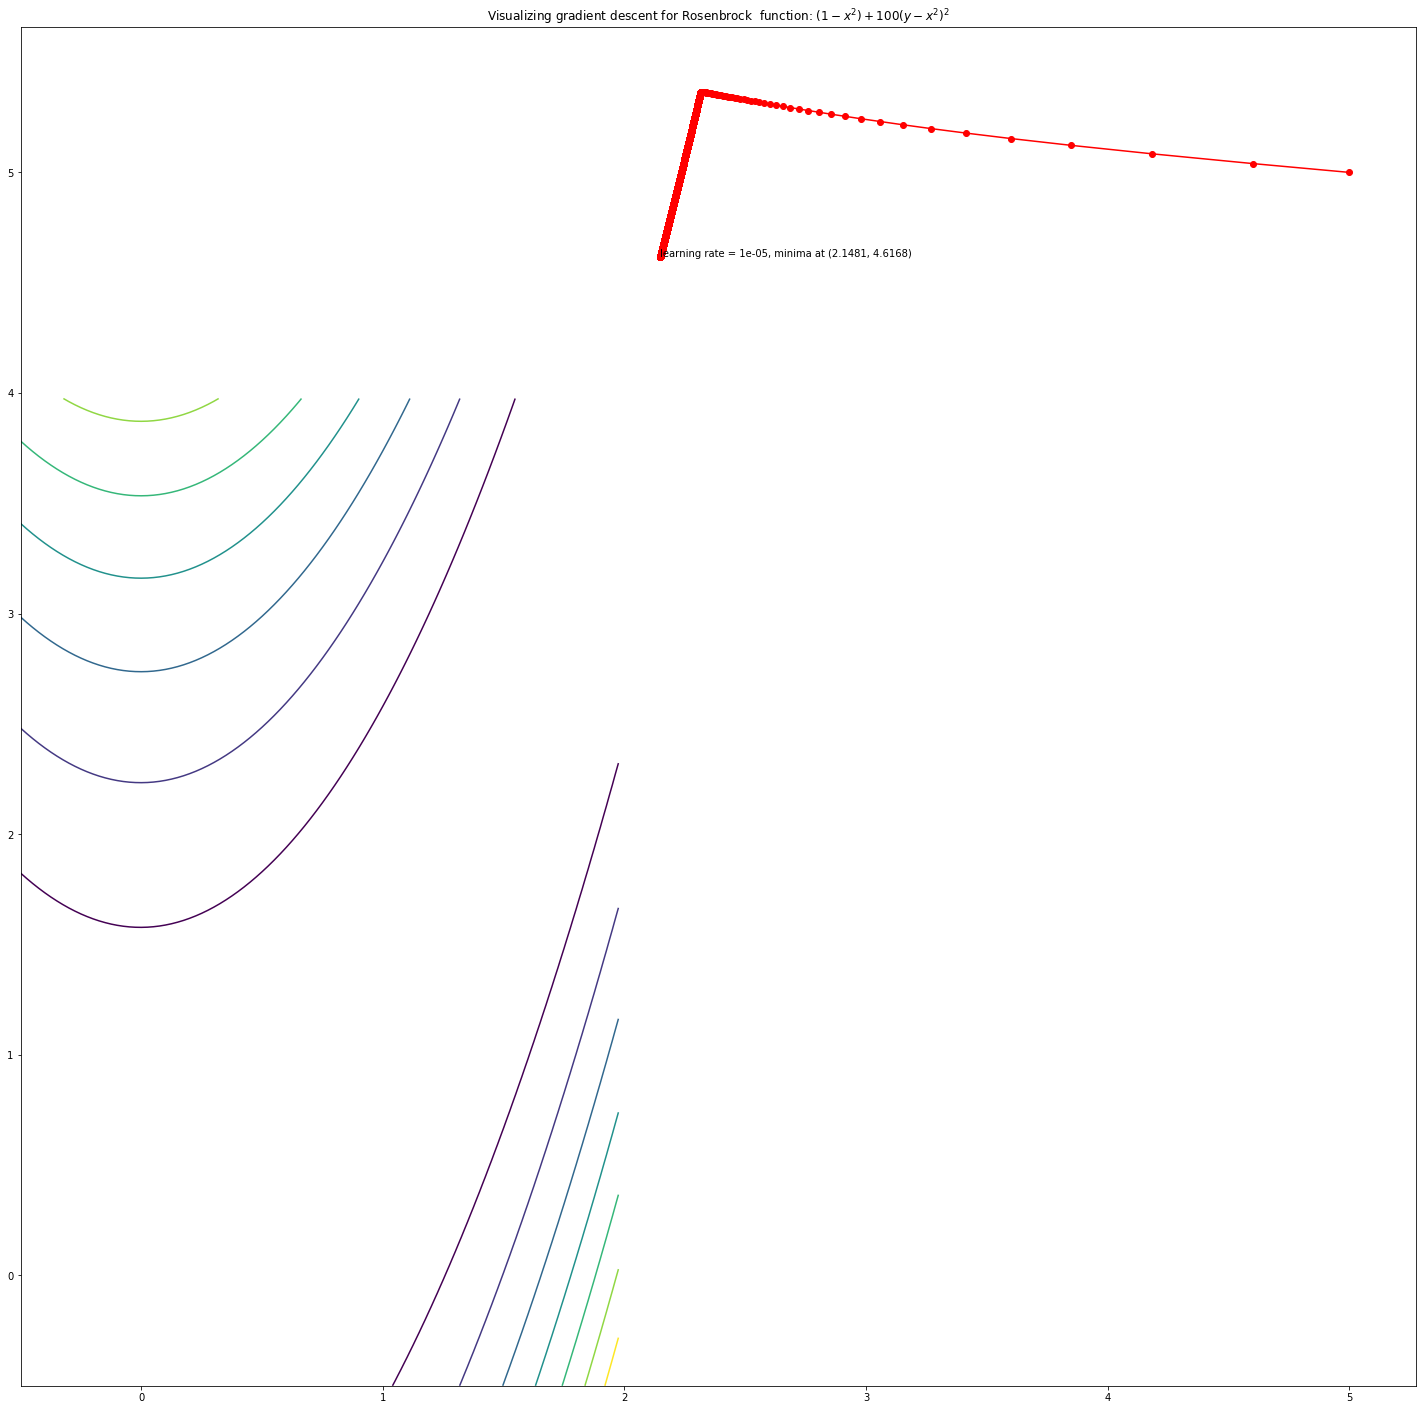

In [465]:
X=np.array([5 , 5])
learning_rate = 0.00001
alpha = 0.3
max_iter = 100000
verbose = False
trajectory = grad_descent_with_momentum(X, learning_rate, alpha, max_iter, verbose)

fig, ax = plt.subplots()
delta = 0.025
x = np.arange(-0.5, 2.0, delta)
y = np.arange(-0.5, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in trajectory]
y = [X[1] for X in trajectory]
plt.plot(x,y,'-o', color='red')
x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )
title = ax.set_title(r'Visualizing gradient descent for Rosenbrock  function: $(1-x^{2}) + 100(y-x^{2})^{2}$')



##### Alpha 0.3, learning rate 0.00001

With $\alpha=0.3$ the minima is reached in half the number of iterations (500,000) as compared to regular gradient descent.

minima not found even after 500000 iterations
Closest we got to the minima was at [1.00396034 1.00795218]


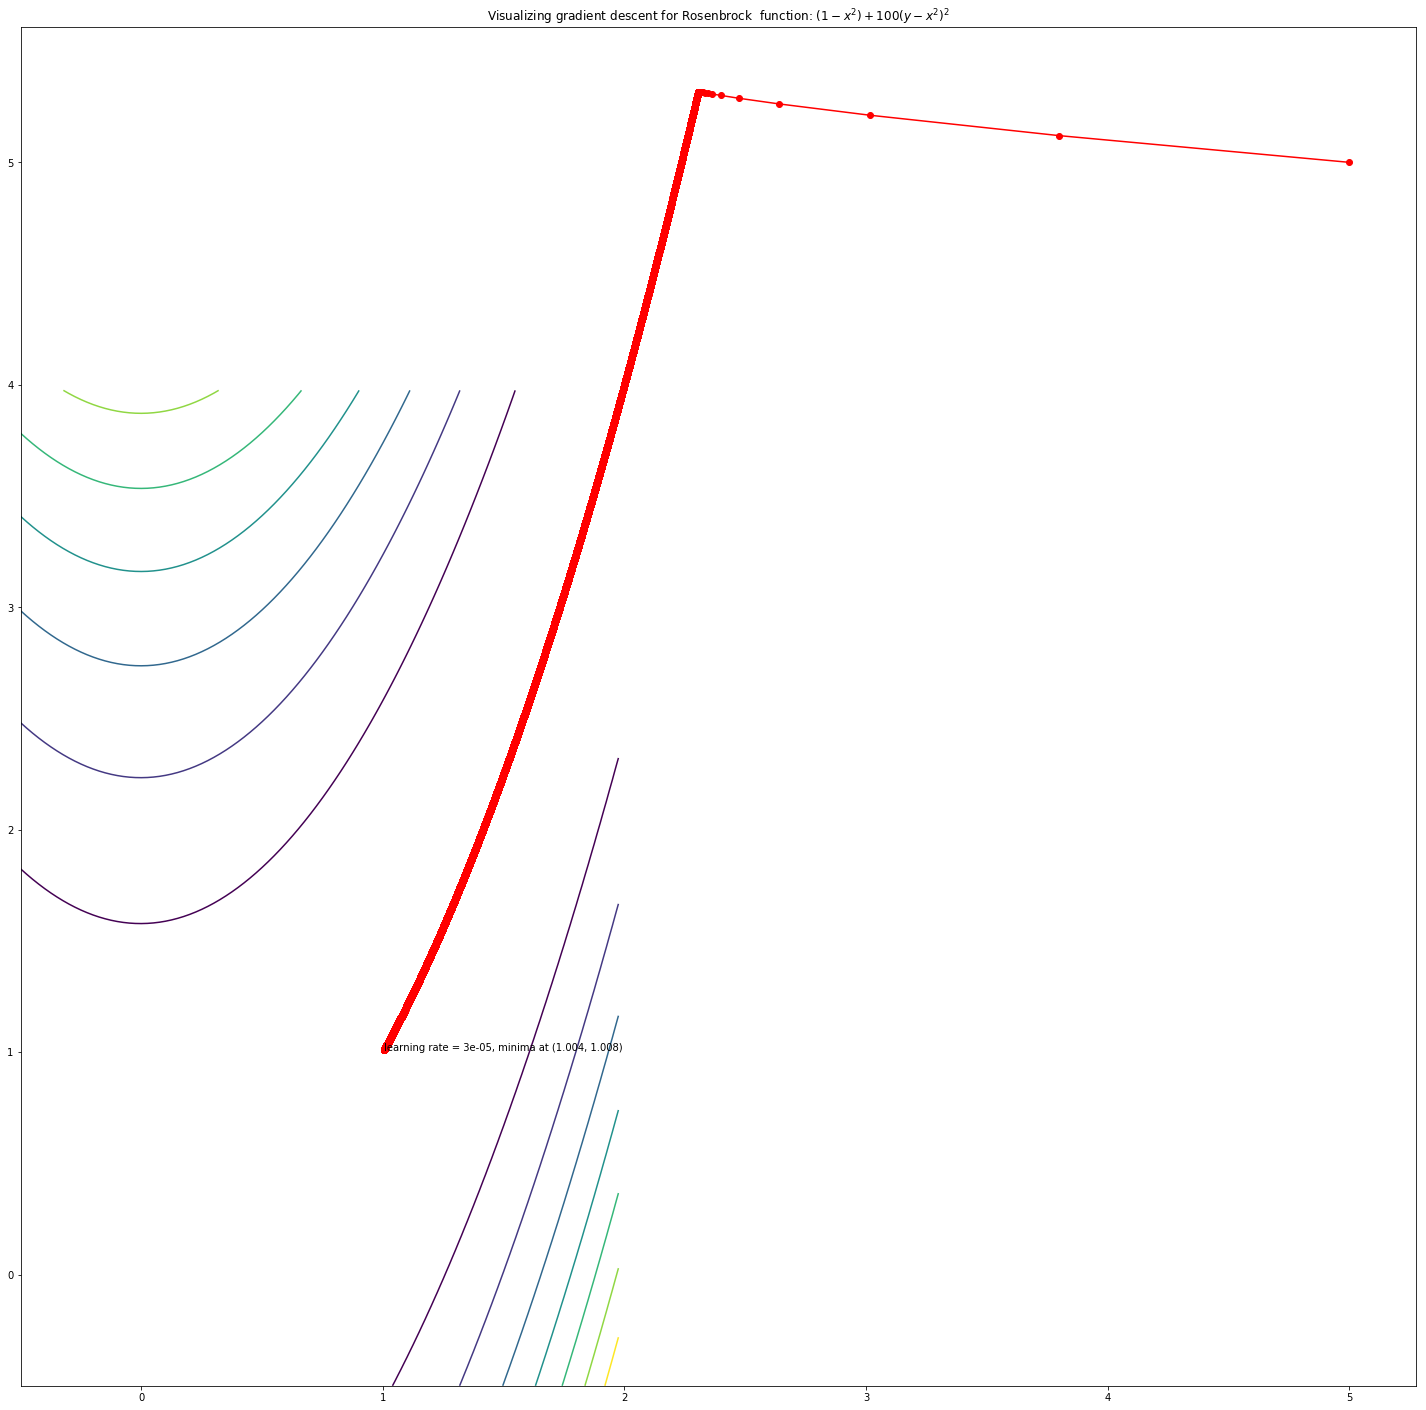

In [483]:
X=np.array([5 , 5])
learning_rate = 0.00003
alpha = 0.3
max_iter = 500000
verbose = False
trajectory = grad_descent_with_momentum(X, learning_rate, alpha, max_iter, verbose)

fig, ax = plt.subplots()
delta = 0.025
x = np.arange(-0.5, 2.0, delta)
y = np.arange(-0.5, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(1-X) + 100*np.square((Y-np.square(X)))
CS = ax.contour(X, Y, Z)
x = [X[0] for X in trajectory]
y = [X[1] for X in trajectory]
plt.plot(x,y,'-o', color='red')
x_min = np.round(x[len(x) - 1], 4)
y_min = np.round(y[len(y) - 1], 4)
annotation = "learning rate = " + str(learning_rate) + ", minima at (" + str(x_min) + ", " + str(y_min) + ")"
ax.annotate(annotation, xy=(x_min, y_min) )
title = ax.set_title(r'Visualizing gradient descent for Rosenbrock  function: $(1-x^{2}) + 100(y-x^{2})^{2}$')



### Problem 3 Backprop

#### Part 1

The diagram of the network is being presented here for ready reference.

![neural network](nn12.png)

The loss function corresponding to softmax output is classification cross-entropy, which is written as

$L = -\sum y_ilog(y_i)$ 

The model parameters are

$\theta = \{c_1, c_2, c_3, u_{11}, u_{12}, u_{13}, u_{21}, u_{22}, u_{23}, b_{21}, b_{22}, v_{11}, v_{12}, v_{21}, v_{22}, v_{31}, v_{32}, b_{11}, b_{12}, b_{13}, w_{11}, w_{12}, w_{13}, w_{21}, w_{22}, w_{23}\}$

Also $\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz}=\hat{y}-y$ (we take this result as given, of course the derivative of this loss function can be derived using the quotient rule and the definition of y=softmax(z)) note that here $y$ and $\hat y$ are both vectors.

Finally, each hidden layer neuron labelled $h_{ij}$ is considered a combination of an output function $out_{ij}$ and an input function $in_{ij}$

Going backwards from the output the partial derivatives of the loss function with respect to the model parameters are as follows

$\frac{dL}{dc_{1}}=\frac{dL}{d\hat{y_1}}\frac{d\hat{y_1}}{dz_1}\frac{dz_1}{dc_1} = \hat y_{1}-y_{1}$

$\frac{dL}{dc_{2}}=\frac{dL}{d\hat{y_2}}\frac{d\hat{y_2}}{dz_2}\frac{dz_2}{dc_2} = \hat y_{2}-y_{2}$

$\frac{dL}{dc_{3}}=\frac{dL}{d\hat{y_3}}\frac{d\hat{y_3}}{dz_3}\frac{dz_3}{dc_3} = \hat y_{3}-y_{3}$

$\frac{dL}{du_{11}}=\frac{dL}{d\hat{y_1}}\frac{d\hat{y_1}}{dz_1}\frac{dz_1}{du_{11}} = (\hat y_{1}-y_{1})out_{21}$

$\frac{dL}{du_{12}}=\frac{dL}{d\hat{y_2}}\frac{d\hat{y_2}}{dz_2}\frac{dz_2}{du_{12}} = (\hat y_{2}-y_{2})out_{21}$

$\frac{dL}{du_{13}}=\frac{dL}{d\hat{y_3}}\frac{d\hat{y_3}}{dz_3}\frac{dz_3}{du_{13}} = (\hat y_{3}-y_{3})out_{21}$

$\frac{dL}{du_{21}}=\frac{dL}{d\hat{y_1}}\frac{d\hat{y_1}}{dz_1}\frac{dz_1}{du_{21}} = (\hat y_{1}-y_{1})out_{22}$

$\frac{dL}{du_{22}}=\frac{dL}{d\hat{y_2}}\frac{d\hat{y_2}}{dz_2}\frac{dz_2}{du_{22}} = (\hat y_{2}-y_{2})out_{22}$

$\frac{dL}{du_{23}}=\frac{dL}{d\hat{y_3}}\frac{d\hat{y_3}}{dz_3}\frac{dz_3}{du_{23}} = (\hat y_{3}-y_{3})out_{22}$

As we move further back into the network, we realize it is impossible to write the partial derivatives in this manner and it would be much simpler to switch to matrix notation.

Using the 4 equations of backpropagation we can write the partial derivative of the loss function for all the parameters of th model as follows. Note that we represent the bias at the output layer with the vector $c$, the weight at the output layer with the matrix $U$, the bias at the second hidden layer with the vector $b_2$, the weights at the second hidden layer with the matrix $V$, the bias at the first hidden layer with the vector $b_1$ and finally the weights at the first hidden layer with the matrix $W$. The output of the second hidden layer is the matrix $H_1$ and the output of the first hidden layer with the matrix $H_1$

$\nabla_{U}{L} = H_{2}^{T}(\hat y - y)$

$\nabla_{c}{L} = \sum_{i}(\hat y_{i} - y_{i})$

$\nabla_{V}{L} = H_{1}^{T}(\hat y - y)U^{T} ReLu^{'}(H_{2})$

$\nabla_{b_{2}}{L} = \sum_{i}(\hat y_{i} - y_{i})U^{T} ReLu^{'}(H_{2})$

$\nabla_{W}{L} = X^{T}((((\hat y - y)U^{T}))V^{T} ReLu^{'}(H_{1})$

$\nabla_{b_{1}}{L} = \sum_{i}(((\hat y_{i} - y_{i})U^{T}V^{T} ReLu^{'}(H_{1})$

### Part 2 grad_f implementation

The code for the grad_f function is provided as part of solution to Part 4. Please see solution to Part 4.

### Part 3 Plotting a GMM
The following code plots a Gaussian mixture model with the given parameters.

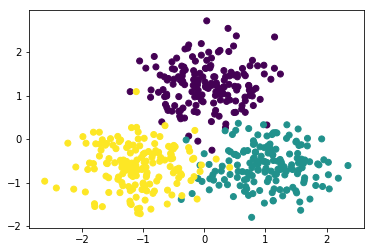

In [484]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd

def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            #cl = np.array([n_class[i]*[i]])
            cl = [i+1]*n_class[i]
        else: 
            xs_new = np.array([x1,x2])
            #cl_new = np.array([n_class[i]*[i]])
            cl_new = [i+1]*n_class[i]
            xs = np.concatenate((xs, xs_new), axis = 1)
            #cl = np.concatenate((cl, cl_new), axis = 1)
            cl = cl + cl_new
            
        # One hot encoding classes
    y = pd.Series(cl) #cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

x,y,cl = gen_gmm_data(500)
plt.scatter(x[:,0], x[:,1], c=cl)

### Part 4 Gradient Descent
The following code provides the SGD implementation for this network.

In [485]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def yhat(X, W, b1, V, b2, U, c):
    # returns model prediction 
    # input to first hidden layer
    a1 = X.dot(W) + b1
    H1 = relu(a1)
    
    # first hidden layer to second hidden layer
    a2 = H1.dot(V) + b2
    H2 = relu(a2)
    
    # second hidden layer to output layer
    a3 = H2.dot(U) + c
    Y_hat = softmax(a3)
    return Y_hat

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13,w_21, w_22,w_23,b_11, b_12,b_13,v_11, v_12, v_21, v_22, v_31, v_32, b_21, b_22,u_11,u_12,u_13,u_21,u_22,u_23,c_1, c_2, c_3 = param_vec
    
    W = np.array([[w_11,w_12,w_13],[w_21,w_22,w_23]])
    b1 = np.array([b_11, b_12, b_13])
    V = np.array([[v_11, v_12],[v_21, v_22],[v_31, v_32]])
    
    b2 = np.array([b_21, b_22])
    U = np.array([[u_11, u_12, u_13], [u_21, u_22, u_23]])
    
    c = np.array([c_1, c_2, c_3])
    
    return((W, b1, V, b2, U, c))
    
def unpack_params(W, b1, V, b2, U, c):
    w_11, w_12, w_13,w_21, w_22,w_23 = W[0,0], W[0,1], W[0,2],W[1,0], W[1,1], W[1,2]
    b_11, b_12, b_13 = b1[0], b1[1], b1[2]
    
    v_11, v_12, v_21, v_22, v_31, v_32 = V[0,0], V[0,1], V[1,0], V[1,1], V[2,0], V[2,1]
    b_21, b_22 = b2[0], b2[1]
    
    u_11,u_12,u_13,u_21,u_22,u_23 = U[0,0], U[0,1], U[0,2], U[1,0], U[1,1], U[1,2]
    c_1, c_2, c_3 = c[0], c[1], c[2]
    
    return np.array([w_11, w_12, w_13,w_21, w_22,w_23,b_11, b_12, b_13,v_11, v_12, v_21, v_22, v_31, v_32,
                     b_21, b_22,u_11,u_12,u_13,u_21,u_22,u_23, c_1, c_2, c_3])

In [486]:
def forward(X,parameters):
    # Unpacking parameters    
    W,b1,V,b2,U,c = parameters
    
    # Forward pass
    
    # input to first hidden layer
    a1 = X.dot(W) + b1
    H1 = relu(a1)
    
    # first hidden layer to second hidden layer
    a2 = H1.dot(V) + b2
    H2 = relu(a2)
    
    # second hidden layer to output layer
    a3 = H2.dot(U) + c
    Y_hat = softmax(a3)
    
    return Y_hat

In [487]:
W = np.random.randn(6).reshape((2,3))
b1 = np.random.randn(3)
V = np.random.randn(6).reshape((3,2))
b2 = np.random.randn(2)
U = np.random.randn(6).reshape((2,3))
c = np.random.randn(3)

In [488]:
def grad_f(param_vec, x, y):
    
    W, b1, V, b2, U, c = pack_params(param_vec)
    
    # input to first hidden layer
    a1 = x.dot(W) + b1
    H1 = relu(a1)
    
    # first hidden layer to second hidden layer
    a2 = H1.dot(V) + b2
    H2 = relu(a2)
    
    # second hidden layer to output layer
    a3 = H2.dot(U) + c
    y_hat = softmax(a3)
    
    d_u = H2.T.dot((y_hat - y))
    d_c = (y_hat - y).sum(axis=0)
    d_v = H1.T.dot(((y_hat - y).dot(U.T) * (H2 > 0))) 
    d_b2 = ((y_hat - y).dot(U.T) * (H2 > 0)).sum(axis=0)
    d_W = x.T.dot((((y_hat - y).dot(U.T)).dot(V.T) * (H1 > 0))) 
    d_b1 = (((y_hat - y).dot(U.T)).dot(V.T) * (H1 > 0)).sum(axis=0)
    
    param_vec = unpack_params(d_W, d_b1, d_v, d_b2, d_u, d_c)
    return np.array(param_vec)

In [489]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26).astype("float")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        loss_this_iter = loss(y, yhat(x, *pack_params(point)))
        # print("loss this iter {}".format(loss_this_iter))
        
        losses.append(loss_this_iter)
    return (np.array(trajectory), losses)

In [490]:
np.random.uniform(-.1,.1,size=26)

array([-0.07694309, -0.02632614,  0.08889175, -0.0502404 , -0.09567947,
        0.06185569,  0.06984968,  0.0073391 ,  0.07860944, -0.06419319,
       -0.04506628, -0.09591005,  0.01668646,  0.07747775,  0.02128025,
       -0.08394284,  0.03864471,  0.03518812, -0.06665116,  0.06579686,
        0.08247807, -0.02166018, -0.03824718,  0.01493475,  0.09450344,
        0.04499262])

In [491]:
np.random.seed(1)
traj, losses = grad_descent(x, y, iterations=500,learning_rate=1e-3)

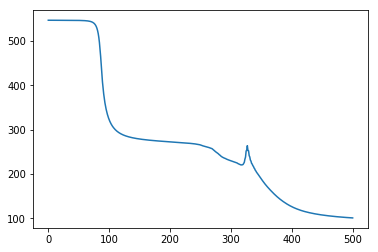

In [492]:
plt.plot(losses)

In [493]:
pred_probs = forward(x,pack_params(traj[-1]))

In [494]:
# accuracy
sum(np.argmax(pred_probs, axis=1)+1 == cl)/len(cl)

0.9417670682730924

### Part 4 SGD with momentum
The SGD momentum converges much much faster than regular SGD. An $\alpha=0.75$ and learning rate 0.001 was used. The SGD with momentum converged in less than 150 iterations and provided almost exactly same accuracy of ~94% as regular SGD did in about 500 iterations. The SGD with momentum converged much faster than regular SGD.

In [495]:
def grad_descent_w_momentum(x, y,  iterations=10, learning_rate=1e-2, alpha=0.9):
    point = np.random.uniform(-.1,.1,size=26).astype("float")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + learning_rate*grad
        point = point - v
        trajectory.append(point)
        loss_this_iter = loss(y, yhat(x, *pack_params(point)))
        # print("loss this iter {}".format(loss_this_iter))
        
        losses.append(loss_this_iter)
    return (np.array(trajectory), losses)

0.9417670682730924

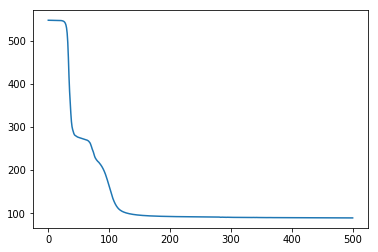

In [496]:
np.random.seed(1)
traj, losses = grad_descent_w_momentum(x, y, iterations=500,learning_rate=1e-3, alpha=0.75)
plt.plot(losses)
pred_probs = forward(x,pack_params(traj[-1]))
# accuracy
sum(np.argmax(pred_probs, axis=1)+1 == cl)/len(cl)